<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
import seaborn as sns

Загрузить датасет по url:


In [17]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

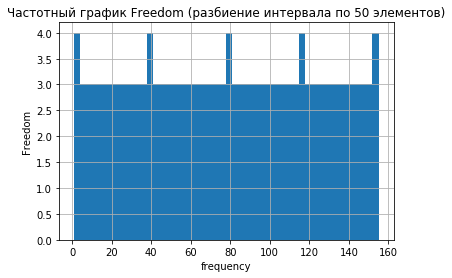

In [6]:
n, bins, patches = plt.hist(df['Freedom'], 50)

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

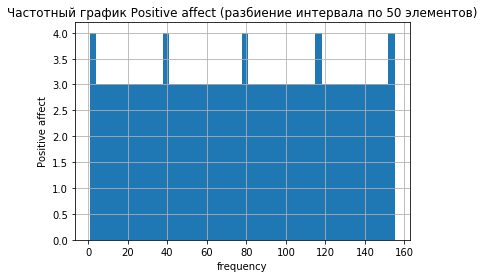

In [7]:
n, bins, patches = plt.hist(df['Positive affect'], 50)

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Частотные графики для параметров Freedom и Positive Affect имеют одинаковую форму гистограммы равномерного распределения.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [29]:
print('Значение моды для колонки Freedom: ', statistics.mode(df['Freedom']))

Медиана для колонки Freedom:  71.0


StatisticsError: no unique mode; found 156 equally common values

In [62]:
#Так как в столбце есть значения NaN, среднее не расчитывается. Удаляю строки с незаполненными значениями для колонки Freedom.
Freedom = df['Freedom'].dropna()

print('Расчет показателей для колонки Freedom')
print('Медиана: ', statistics.median(df['Freedom']))
print('Среднее значение: ', statistics.mean(Freedom))
print(f'Стандартное отклонение: {statistics.pstdev(Freedom):.2f}')
print(f'Дисперсия: {statistics.pvariance(Freedom):.2f}')
print(f'Минимум: {min(Freedom)}')
print(f'Максимум: {max(Freedom)}')

Расчет показателей для колонки Freedom
Медиана:  71.0
Среднее значение:  78.0
Стандартное отклонение: 44.74
Дисперсия: 2002.00
Минимум: 1.0
Максимум: 155.0


In [33]:
# Проверяем, что в данных нет нулевых значений
Freedom.isnull().sum()

0

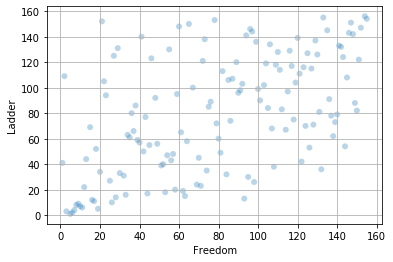

In [44]:
# Построим точечный график для колонки Freedom относительно колонки Ladder.
# Так как в колонке Freedom есть строки с незаполненными значениями, я удаляю пустые строки из таблицы. 
# Как лучше обойти эту ситуацию, чтобы не удалять лишние данные?

df_drop = df.dropna()
#print(df.shape, df_drop.shape)
Freedom = df_drop['Freedom']
Ladder = df_drop['Ladder']
fig, ax = plt.subplots()
ax.scatter(Freedom, Ladder, alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Ladder')
plt.show()

Явных выбросов для колонки Freedom в наборе данных нет.

In [59]:
Freedom_range = (max(df['Freedom']) - min(df['Freedom']))
print(f'Размах значений для колонки Freedom: {Freedom_range}')

Размах значений для колонки Freedom: 154.0


**Почему нельзя найти моду?**

В данном наборе данных нельзя найти моду, потому что в нем все значения уникальны. Текст ошибки:
no unique mode; found 156 equally common values

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.697


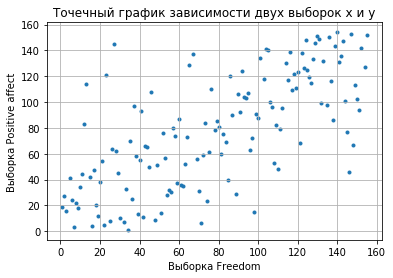

In [72]:
# Посмотрим, есть ли корреляция между колонками Freedom и positive affect.
Freedom = df_drop['Freedom']
Positive_affect = df_drop['Positive affect']

plt.xlabel('Выборка Freedom')
plt.ylabel('Выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.')


# Коэффициент корреляции Пирсона
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom, Positive_affect)
print(f'Коэффициент корреляции Пирсона: {corr:.3f}')

Между набором данных Freedom и Positive_affect существует достаточно высокая прямая корреляция. Можно предположить, что чем больше в стране свобод, тем больше положительных эмоций испытывают граждане этой страны.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [77]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0
0,0.025974
1,0.032468
2,0.012987
3,0.038961
4,0.116883


Построить матрицу корреляций для всех колонок таблицы

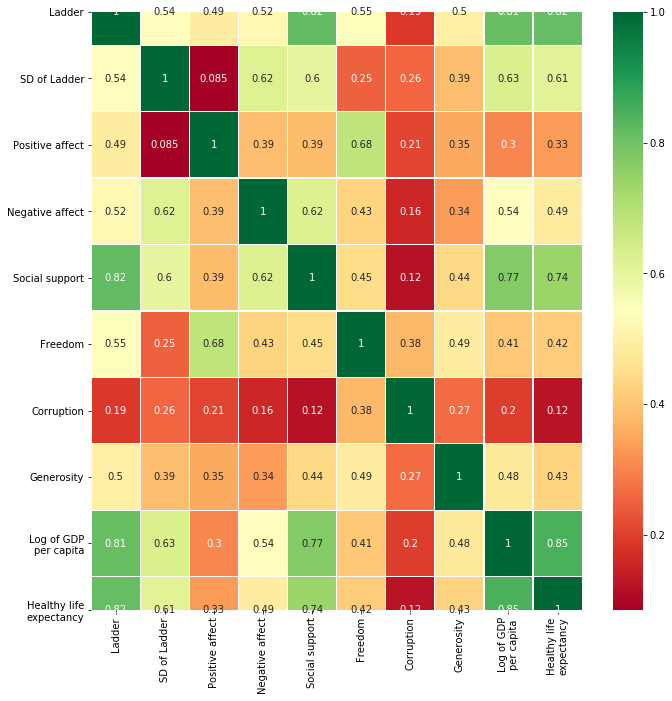

In [80]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(11,11)
plt.show()

Загрузить таблицу цен на авокадо: 

In [82]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_avocado=pd.read_csv(url)
df_avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

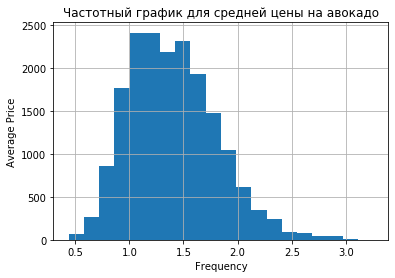

In [87]:
n, bins, patches = plt.hist(df_avocado['AveragePrice'], 20)

plt.xlabel('Frequency')
plt.ylabel('Average Price')
plt.title('Частотный график для средней цены на авокадо')
plt.grid(True)
plt.show()

График средней цены на авокадо представляет собой нормальное распределение, которое представлено унимодальной гистограммой. Нормальное распределение по Гаусу со смешением влево, то есть гистограмма с положительной асимметрией.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [91]:
# Сократим наш датасет и оставим только столбцы, между которыми нужно найти корреляцию.
df_avocado_cart = df_avocado[ ['AveragePrice', '4046', '4225', '4770'] ]
df_avocado_cart.head()

,AveragePrice,4046,4225,4770
0,1.33,1036.74,54454.85,48.16
1,1.35,674.28,44638.81,58.33
2,0.93,794.70,109149.67,130.50
3,1.08,1132.00,71976.41,72.58
4,1.28,941.48,43838.39,75.78


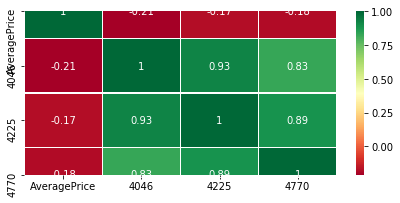

In [101]:
sns.heatmap(df_avocado_cart.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
fig.set_size_inches(7,3)
plt.show()

# Почему-то отрезается часть цифр. Как можно было бы их показать?

Существует невысокая обратная корреляция между средней стоимостью авокадо и количеством продаж. Больше всего стоимость влияет на продажи авокадо с маркировкой 4046. Коэффициент корреляции составляет 21%.

Для авокадо с маркировкой 4225 и 4770 коэффициент корреляции составляет 17% и 18% соответственно. 

Обратная корреляция означает, что чем выше стоимость, тем ниже количество продаж и наоборот.